In [22]:
%matplotlib notebook
#import matplotlib.pyplot as plt
# Note! ITK interacts weirdly here.  from lazy_imports import itk does not work.
# Additionally, import itk must occur before lazy_imports for itkwidgets.view (ie itkview) to work.
import itk
#from lazy_imports import itk
from lazy_imports import np
from lazy_imports import plt
from lazy_imports import sitk
from lazy_imports import loadmat, savemat
from lazy_imports import interactive
from lazy_imports import ipywidgets
from lazy_imports import pv
import pandas as pd
#import seaborn as sns

plt.rcParams["figure.figsize"] = (6, 6) # (w, h)

# Display Configuration

In [3]:
# from colorbrewer2, sequential 9 values pasted together YlGnBu (reverse order) then YlOrRd
# EXCEPT THESE ARE NOT PRINT FRIENDLY OR PHOTOCOPY SAFE!!!
# But skip the yellows in the middle -- too light
geo_colors = ['tab:red', 'tab:pink', 'tab:orange', 'tab:blue', 'tab:purple', 'tab:green', 'tab:cyan']
eul_colors = ['k', 'tab:gray', 'tab:brown', 'm', 'y', 'tab:olive', 'maroon']
#interp_colors = ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9',
#                 '#ffffcc', '#ffeda0', '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026']
interp_colors = ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4',
                 '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026']
# Compromise, use 5 class YlGnBu (reverse order) and YlOrBr again leaving out yellow
#interp_colors = ['#253494', '#2c7fb8', '#41b6c4', '#a1dab4', '#fed98e', '#fe9929', '#d95f0e', '#993404']

# Helper Functions

In [5]:
def read_abcd_csv(filename, index_cols=None):
  """ Read an ABCD measure.  Note that the ABCD header is 2 lines, where the second line provides additional detail sometimes.  We will read this data in and the columns entry will be a tuple of size 2.  Returned dataframe will have a multiindex of subjectkey,eventname """

  if index_cols is None:
    index_cols = ['subjectkey','eventname']
  
  # First read the first few rows in to get the header info.
  df = pd.read_csv(filename, header=[0,1],sep='\t',nrows=5)
  orig_midx_hdr = df.columns
  
  # Then read all the data, indexing in subjectkey and eventname
  df = pd.read_csv(filename, header=0,skiprows=[1],index_col=index_cols,sep='\t')#,nrows=nrows)
  hdr = df.columns

  new_midx_hdr = pd.MultiIndex.from_tuples([orig_midx_hdr[col] for col in range(len(orig_midx_hdr)) if orig_midx_hdr[col][0] in hdr])

  df.columns = new_midx_hdr

  return(df)


# Read in Data

In [6]:
datadir = '/usr/sci/projects/abcd/'
anxiety_vars_file = datadir + 'anxiety_study_vars.csv'
df = read_abcd_csv(anxiety_vars_file)

In [7]:
df

abcd_dmriqc01_id abcd_drsip101_id  \
                                          abcd_dmriqc01_id abcd_drsip101_id   
subjectkey       eventname                                                    
NDAR_INV07RAHHYH 1_year_follow_up_y_arm_1              NaN              NaN   
                 2_year_follow_up_y_arm_1             19.0            139.0   
                 baseline_year_1_arm_1                20.0            140.0   
NDAR_INV0KPZW3NB 1_year_follow_up_y_arm_1              NaN              NaN   
                 2_year_follow_up_y_arm_1            409.0            446.0   
...                                                    ...              ...   
NDAR_INVXTRHH68Z 2_year_follow_up_y_arm_1          15700.0          17702.0   
                 baseline_year_1_arm_1             15701.0          17726.0   
NDAR_INVY43C1PAY 1_year_follow_up_y_arm_1              NaN              NaN   
                 2_year_follow_up_y_arm_1          16667.0          19280.0   
                 baseline_year_1_arm_1             16668.0          19302.0   

                                          abcd_ehis01_id abcd_ksad01_id  \
                                          abcd_ehis01_id abcd_ksad01_id   
subjectkey       eventname                                                
NDAR_INV07RAHHYH 1_year_follow_up_y_arm_1            NaN         190594   
                 2_year_follow_up_y_arm_1            NaN         190595   
                 baseline_year_1_arm_1           33113.0         190596   
NDAR_INV0KPZW3NB 1_year_follow_up_y_arm_1            NaN         190710   
                 2_year_follow_up_y_arm_1            NaN         190717   
...                                                  ...            ...   
NDAR_INVXTRHH68Z 2_year_follow_up_y_arm_1            NaN         221169   
                 baseline_year_1_arm_1           42473.0         221170   
NDAR_INVY43C1PAY 1_year_follow_up_y_arm_1            NaN         220501   
                 2_year_follow_up_y_arm_1            NaN         220502   
                 baseline_year_1_arm_1           42893.0         219997   

                                          abcd_ksad501_id abcd_t2wqc01_id  \
                                          abcd_ksad501_id abcd_t2wqc01_id   
subjectkey       eventname                                                  
NDAR_INV07RAHHYH 1_year_follow_up_y_arm_1          173743             NaN   
                 2_year_follow_up_y_arm_1          173639            15.0   
                 baseline_year_1_arm_1             173640            16.0   
NDAR_INV0KPZW3NB 1_year_follow_up_y_arm_1          174151             NaN   
                 2_year_follow_up_y_arm_1          174158           398.0   
...                                                   ...             ...   
NDAR_INVXTRHH68Z 2_year_follow_up_y_arm_1          204248         17197.0   
                 baseline_year_1_arm_1             204277         17198.0   
NDAR_INVY43C1PAY 1_year_follow_up_y_arm_1          203773             NaN   
                 2_year_follow_up_y_arm_1          203799         17797.0   
                 baseline_year_1_arm_1             203800         17798.0   

                                          abcd_tbss01_id  \
                                          abcd_tbss01_id   
subjectkey       eventname                                 
NDAR_INV07RAHHYH 1_year_follow_up_y_arm_1            NaN   
                 2_year_follow_up_y_arm_1        53060.0   
                 baseline_year_1_arm_1           53061.0   
NDAR_INV0KPZW3NB 1_year_follow_up_y_arm_1            NaN   
                 2_year_follow_up_y_arm_1        53442.0   
...                                                  ...   
NDAR_INVXTRHH68Z 2_year_follow_up_y_arm_1        74670.0   
                 baseline_year_1_arm_1           74671.0   
NDAR_INVY43C1PAY 1_year_follow_up_y_arm_1            NaN   
                 2_year_follow_up_y_arm_1        73631.0   
                 baseline

In [16]:
flatdf=df.reset_index()
  

# compute scores for symptoms at baseline 
symptoms_df = flatdf[flatdf['eventname'].str.contains('baseline')].filter(regex = r'subjectkey|Symptom', axis=1)
symptoms_df = symptoms_df.replace({888.0:0.0,555.0:0.0})
symptoms_df = symptoms_df.set_index('subjectkey')
symptoms_df

,ksads_10_320_p,ksads_10_320_t,ksads_10_321_p,ksads_10_321_t,ksads_10_322_p,ksads_10_322_t,ksads_10_323_p,ksads_10_323_t,ksads_10_324_p,ksads_10_324_t,...,ksads_9_40_p,ksads_9_40_t,ksads_9_41_p,ksads_9_41_t,ksads_9_42_p,ksads_9_42_t,ksads_9_43_p,ksads_9_43_t,ksads_9_44_p,ksads_9_44_t
,Symptom - Excessive worries across breadth of domains Present,"Symptom - Excessive worries across breadth of domains, Present",Symptom - Excessive worries across breadth of domains Past,"Symptom - Excessive worries across breadth of domains, Past",Symptom - Worry associated with defined symptom(s) Present,"Symptom - Worry associated with defined symptom(s), Present",Symptom - Worry associated with defined symptom(s) Past,"Symptom - Worry associated with defined symptom(s), Past",Symptom - Difficulty controlling worries Present,"Symptom - Difficulty controlling worries, Present",...,Symptom - Impairment due to fear or avoidance of phobic object Past,Symptom - Impairment due to fear or avoidance of phobic object Past,Symptom - Distress due to fear or avoidance of phobic object Present,Symptom - Distress due to fear or avoidance of phobic object Present,Symptom - Distress due to fear or avoidance of phobic object Past,Symptom - Distress due to fear or avoidance of phobic object Past,Symptom - Duration of phobia at least 6 months Present,Symptom - Duration of phobia at least 6 months Present,Symptom - Duration of past phobia at least 6 months Present,"Symptom - Duration of past phobia at least 6 months, Present"
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDAR_INV07RAHHYH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDAR_INV0KPZW3NB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
NDAR_INV1EECRFPM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
NDAR_INV1MHAP6AR,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
NDAR_INV2RJ8ZRGL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDAR_INV2YH5GYE4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDAR_INV3W5X0ZBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDAR_INV402278X9,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [28]:
num_cols = len(symptoms_df.columns)
symptoms_total = symptoms_df.sum(axis=1) / num_cols
symptoms_total.name = 'SymptomScore'
#symptoms_df.append(symptoms_total)
symptoms_total


subjectkey
NDAR_INV07RAHHYH    0.007440
NDAR_INV0KPZW3NB    0.010539
NDAR_INV1EECRFPM    0.010539
NDAR_INV1MHAP6AR    0.061996
NDAR_INV2RJ8ZRGL    0.009919
NDAR_INV2YH5GYE4    0.004960
NDAR_INV3W5X0ZBG    0.001860
NDAR_INV402278X9    0.079355
NDAR_INV4G19G9J8    0.008060
NDAR_INV5784LZWF    0.003100
NDAR_INV5P2UAGPW    0.000620
NDAR_INV6F8VJE7N    0.017359
NDAR_INV6NYCB4Y6    0.069436
NDAR_INV6VZBKHPK    0.000000
NDAR_INV7F1N85W0    0.058277
NDAR_INV80PL5DHV    0.002480
NDAR_INV9DV0865Y    0.058896
NDAR_INV9HVAC68Z    0.003720
NDAR_INV9WY3R321    0.003720
NDAR_INVAP80JDC6    0.006200
NDAR_INVB8G9KFMC    0.070056
NDAR_INVCMGFWG2E    0.081215
NDAR_INVCVZ70012    0.016739
NDAR_INVEYKTM50X    0.003720
NDAR_INVGC7NCM6H    0.031618
NDAR_INVH7TVMCPN    0.044637
NDAR_INVHF1GBEEX    0.009919
NDAR_INVJXA05086    0.040298
NDAR_INVK62C7NW4    0.047737
NDAR_INVL1GF9KZ8    0.006820
NDAR_INVN4BPDTK4    0.003720
NDAR_INVPC72NTBK    0.027898
NDAR_INVPDFDEURE    0.009299
NDAR_INVVFCBH31R    0.030998
NDA

                  SymptomScore  OurAnxietyIndicator
subjectkey                                         
NDAR_INV6VZBKHPK      0.000000                  0.0
NDAR_INV5P2UAGPW      0.000620                  0.0
NDAR_INV3W5X0ZBG      0.001860                  0.0
NDAR_INV80PL5DHV      0.002480                  0.0
NDAR_INV5784LZWF      0.003100                  0.0
NDAR_INV9WY3R321      0.003720                  0.0
NDAR_INVN4BPDTK4      0.003720                  0.0
NDAR_INVEYKTM50X      0.003720                  0.0
NDAR_INV9HVAC68Z      0.003720                  0.0
NDAR_INVY43C1PAY      0.003720                  0.0
NDAR_INV2YH5GYE4      0.004960                  0.0
NDAR_INVAP80JDC6      0.006200                  0.0
NDAR_INVWKNKABEN      0.006820                  0.0
NDAR_INVL1GF9KZ8      0.006820                  0.0
NDAR_INV07RAHHYH      0.007440                  1.0
NDAR_INV4G19G9J8      0.008060                  0.0
NDAR_INVPDFDEURE      0.009299                  1.0
NDAR_INV2RJ8

<IPython.core.display.Javascript object>


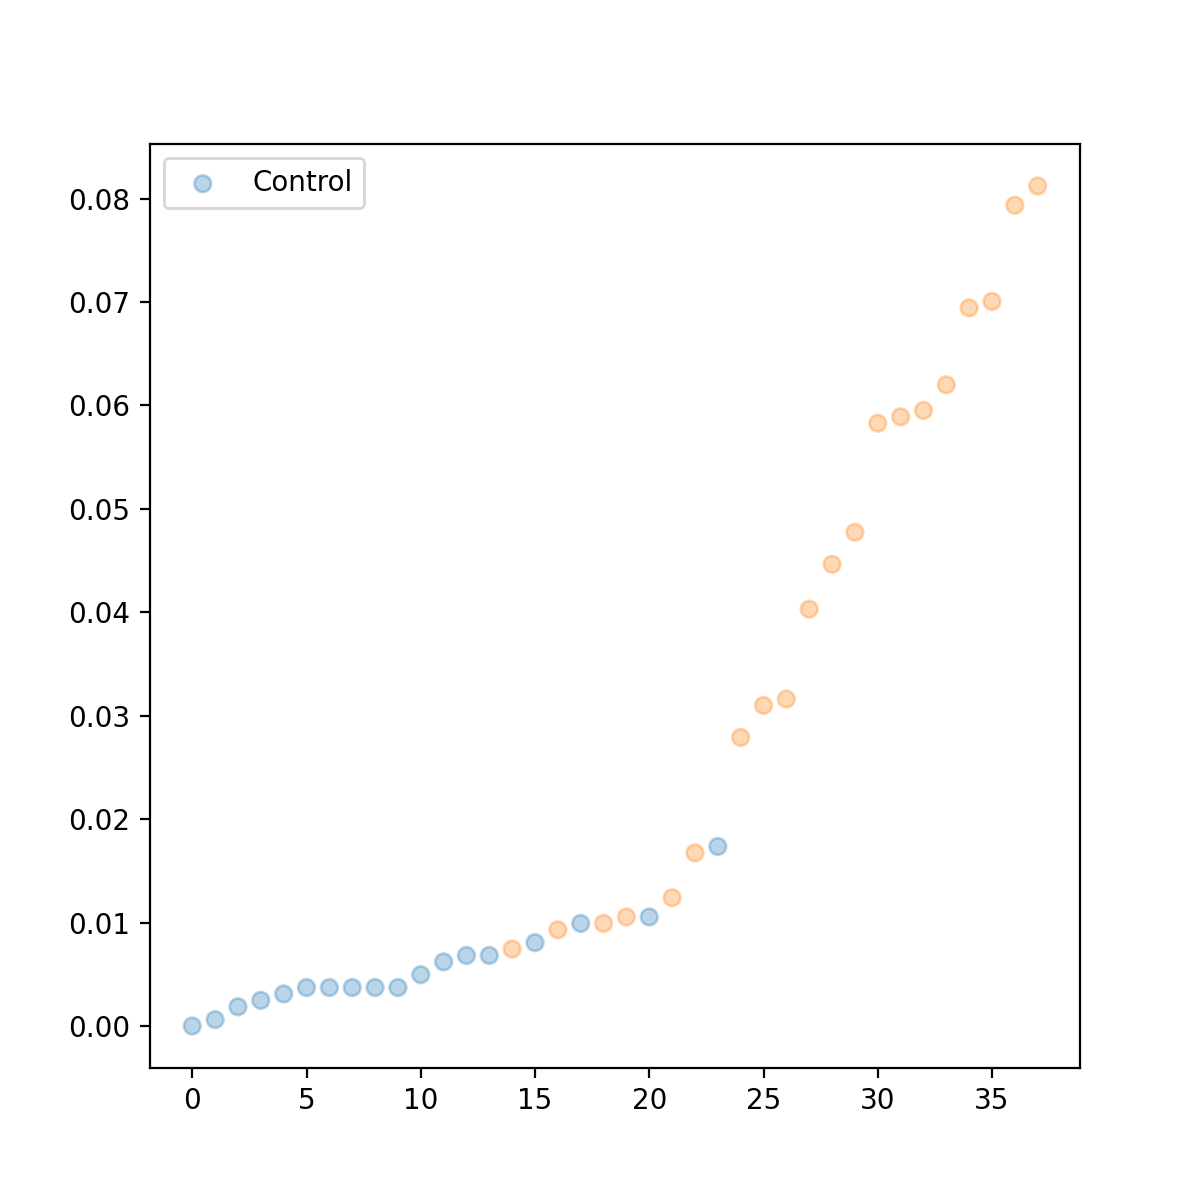

In [62]:

groups = flatdf[flatdf['eventname'].str.contains('baseline')].set_index('subjectkey').droplevel(1, axis=1)['OurAnxietyIndicator']
plt_df = pd.concat([symptoms_total, groups],axis=1).sort_values(by=['SymptomScore'])
print(plt_df)
y = plt_df['SymptomScore']
x = range(len(y))
sorted_groups = plt_df['OurAnxietyIndicator']
colors = {1.0:'tab:orange', 0.0:'tab:blue'}

plt.scatter(x, y, alpha=0.3,
            c= sorted_groups.map(colors))
ax = plt.gca()
ax.legend(['Control','Case'])
plt.show()